In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

From EDA we have seen that:
1. lower education board is not relevant
2. mba % is not highly correlated to the status.
3. We should remove the salary column while training our model because it makes the job too easy.


In [154]:
data = pd.read_csv("Placement_Data_Full_Class.csv")
data['salary'].fillna(0)


0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 215, dtype: float64

In [155]:
from sklearn.preprocessing import StandardScaler

In [206]:
df = data[['ssc_p','hsc_p','degree_p','gender', 'degree_t', 'workex', 'etest_p', 'specialisation','status']]


In [207]:
from sklearn.preprocessing import LabelEncoder
object_cols=['gender','workex','specialisation','status','degree_t']
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
 

C:\Users\skoli\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [208]:
X = df.drop('status', axis = 1)
y = df['status']


In [209]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [218]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

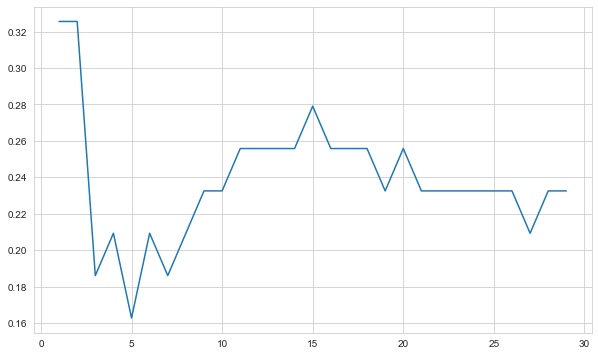

In [219]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate)


least error at k = 6

In [221]:
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print ("WITH K = 6")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test,pred))

WITH K = 6


[[ 6  6]
 [ 3 28]]


              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.82      0.90      0.86        31

    accuracy                           0.79        43
   macro avg       0.75      0.70      0.72        43
weighted avg       0.78      0.79      0.78        43



 Sample size is very small.



# Random Forrest

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [236]:
pred2 = rfc.predict(X_test)

In [237]:
print("\n")
print(confusion_matrix(y_test, pred2))
print("\n")
print(classification_report(y_test,pred2))



[[ 8  4]
 [ 4 27]]


              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.87      0.87      0.87        31

    accuracy                           0.81        43
   macro avg       0.77      0.77      0.77        43
weighted avg       0.81      0.81      0.81        43



We get better results with random forests